In [35]:
# 안경책 p306

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [37]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [39]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [40]:
#df.to_csv("boston.csv")

In [41]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [42]:
#boston 내에 price 가 없음으로 boston.target 에서 price를 뽑아서 넣음
df['PRICE'] = boston.target
df.to_csv('boston.csv')

In [43]:
df.shape

(506, 14)

In [44]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
y = df["PRICE"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [47]:
X = df.drop(['PRICE'], axis=1, inplace = False)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [57]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0.0,0.6470,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0.0,0.5730,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0.0,0.4130,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0.0,0.4530,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
418,73.53410,0.0,18.10,0.0,0.6790,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88


In [50]:
# lr = LinearRegression()

In [51]:
# lr.fit(X_train, Y_train)

In [58]:
lr = LinearRegression().fit(X_train, Y_train)

In [59]:
y_predict = lr.predict(X_test)

In [60]:
print(y_test[:5])

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
Name: PRICE, dtype: float64


In [61]:
print(y_predict[:5])

[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641]


In [62]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [63]:
rmse

4.158956107955715

In [64]:
lr.intercept_

40.995595172164336

In [65]:
np.round(lr.coef_, 2)

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])

In [66]:
print(np.round(lr.coef_, 2))

[-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

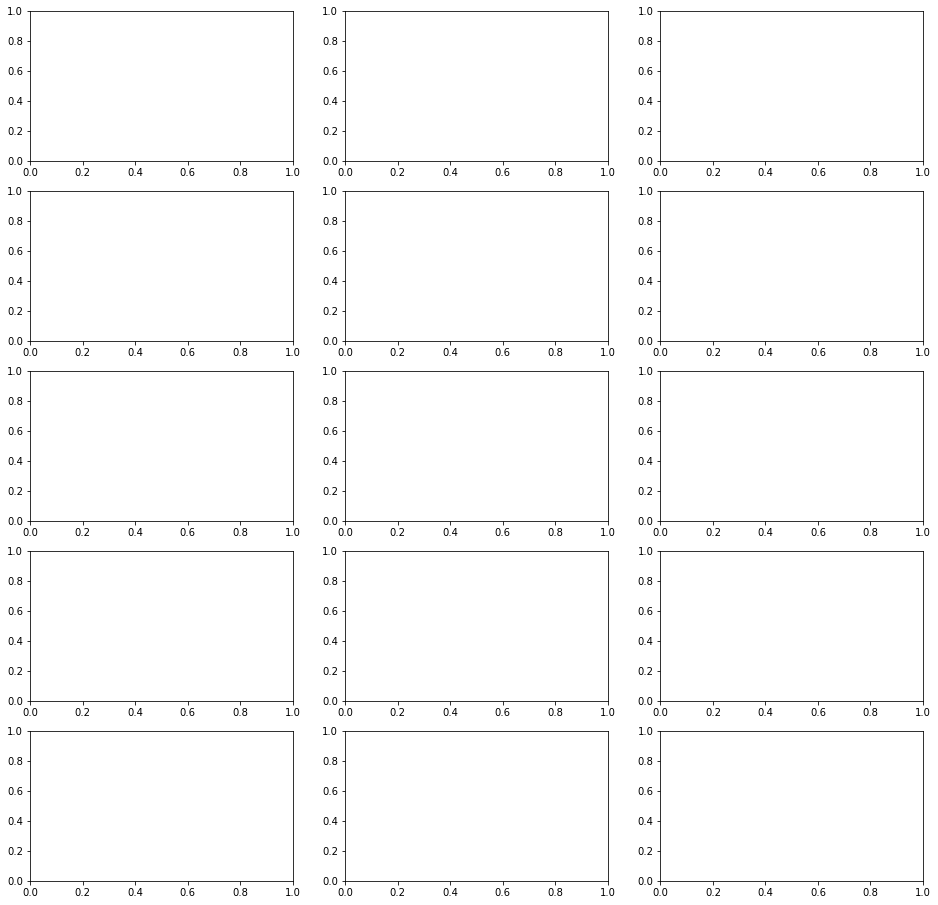

In [70]:
fig, axes = plt.subplots(5, 3,figsize=(16,16))

In [71]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

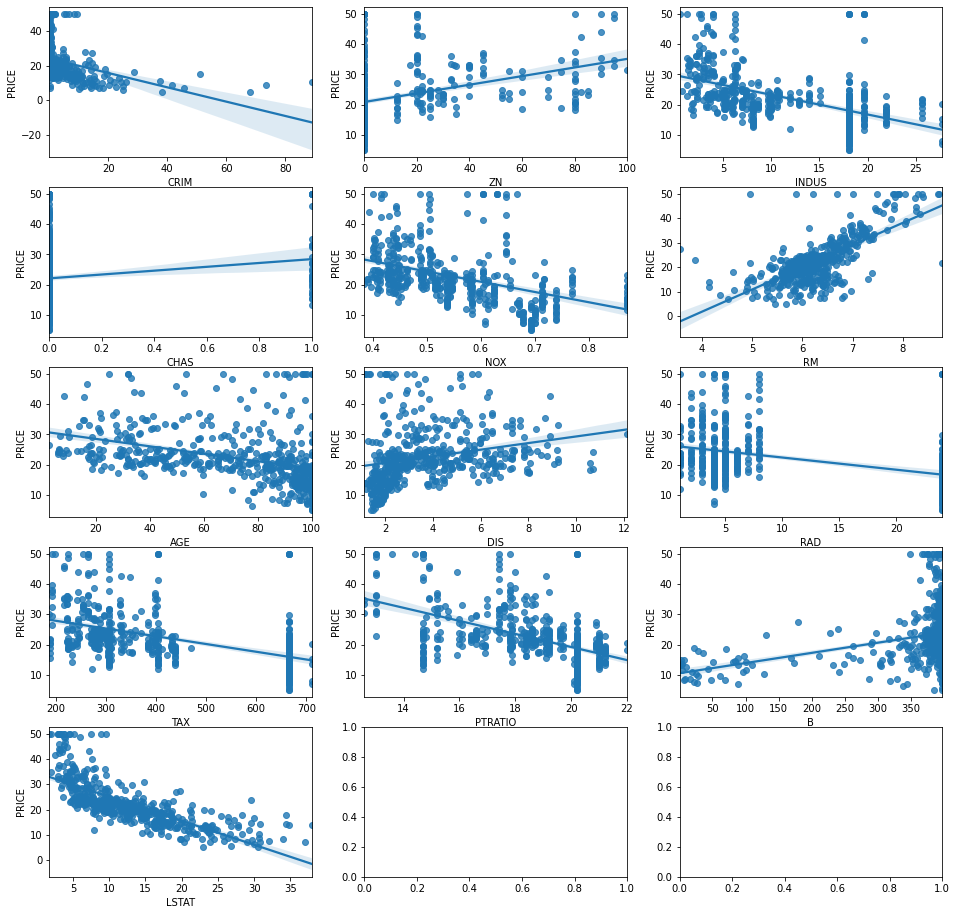

In [77]:
# 데이터를 분석하는 것이 문제임
# 코드는 나중에
# 후에 보고서에 데이터 분석을 중점으로
fig, axes = plt.subplots(5, 3,figsize=(16,16))
x_features = X_train.columns
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col])